In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [5]:
filename = "ASTR19_F25_group_project_data.txt"

In [6]:
raw = np.genfromtxt(filename, dtype=str, comments="#")

days = raw[:,0].astype(float)   
time_strings = raw[:,1]          
heights = raw[:,2].astype(float)  

In [7]:
def hhmm_to_hours(s):
    hh, mm = s.split(":")
    return float(hh) + float(mm)/60.0

hours = np.array([hhmm_to_hours(s) for s in time_strings])

t = days + hours/24.0

t = t - t.min()

y = heights
sigma = np.full_like(y, 0.25)

In [8]:
def tide_model(t, A1, phi1, A2, phi2, offset):
    T1 = 0.5175   
    T2 = 1.0      
    return (A1 * np.sin(2*np.pi*t/T1 + phi1) +
            A2 * np.sin(2*np.pi*t/T2 + phi2) +
            offset)

In [9]:
initial_guess = [2.0, 0.0, 0.5, 0.0, np.mean(y)]

params, cov = curve_fit(
    tide_model, t, y,
    p0=initial_guess,
    sigma=sigma,
    absolute_sigma=True,
    maxfev=20000
)

A1, phi1, A2, phi2, offset = params

print("Fitted parameters:")
print(f"A1     = {A1:.4f}")
print(f"phi1   = {phi1:.4f}")
print(f"A2     = {A2:.4f}")
print(f"phi2   = {phi2:.4f}")
print(f"offset = {offset:.4f}")

Fitted parameters:
A1     = 1.0194
phi1   = -0.0591
A2     = -2.6761
phi2   = 4.9914
offset = 2.5238


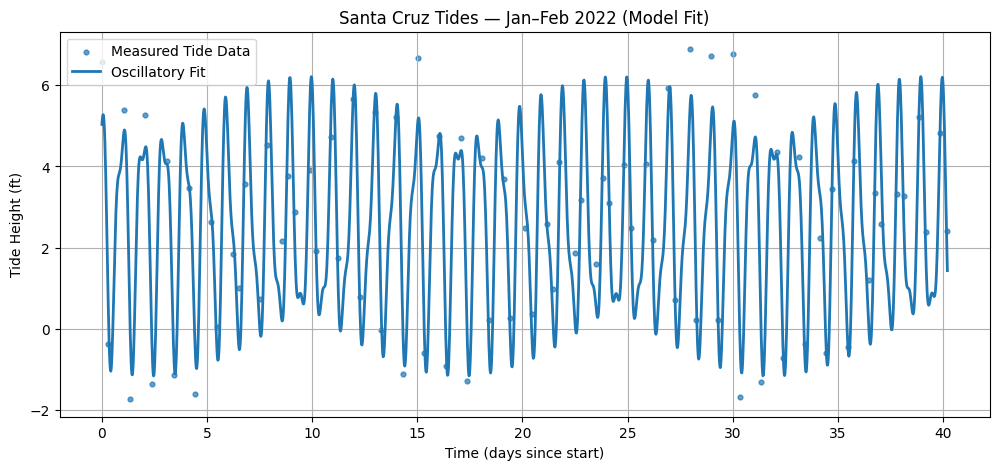

In [10]:
t_fit = np.linspace(t.min(), t.max(), 2000)
y_fit = tide_model(t_fit, *params)

plt.figure(figsize=(12,5))
plt.scatter(t, y, s=12, label="Measured Tide Data", alpha=0.7)
plt.plot(t_fit, y_fit, linewidth=2, label="Oscillatory Fit")

plt.xlabel("Time (days since start)")
plt.ylabel("Tide Height (ft)")
plt.title("Santa Cruz Tides — Jan–Feb 2022 (Model Fit)")
plt.legend()
plt.grid(True)
plt.savefig("tide_fit_plot.pdf")
plt.show()

In [11]:
## SECOND HALF STARTS HERE!!!

In [15]:
import numpy as np
import matplotlib.pyplot as plt

y_model = tide_model(t, *params)     # compute modeled values
residuals = y - y_model              # compute residuals

res_std = np.std(residuals, ddof=1)
print("Residual standard deviation:", res_std)

Residual standard deviation: 0.87661793790425


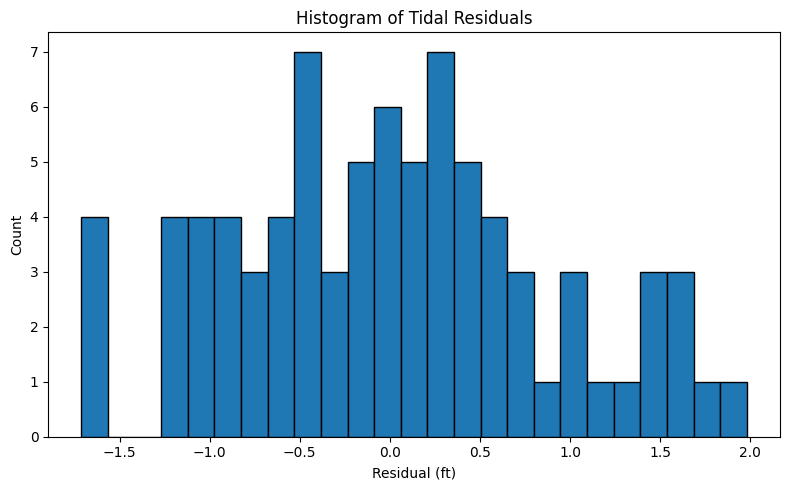

Residual standard deviation (recomputed for clarity): 0.87661793790425
Estimated intrinsic scatter: 0.7200409773446922


In [16]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8,5))
plt.hist(residuals, bins=25, edgecolor='black')
plt.title("Histogram of Tidal Residuals")
plt.xlabel("Residual (ft)")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("tidal_residuals_histogram.pdf")
plt.show()

print("Residual standard deviation (recomputed for clarity):", np.std(residuals, ddof=1))

MEAS_ERROR = 0.5  # example placeholder — replace with your actual assigned value

intrinsic_scatter = np.sqrt(max(0, np.std(residuals, ddof=1)**2 - MEAS_ERROR**2))
print("Estimated intrinsic scatter:", intrinsic_scatter)


The 2 ft tsunami event is 2.28 standard deviations from the model.


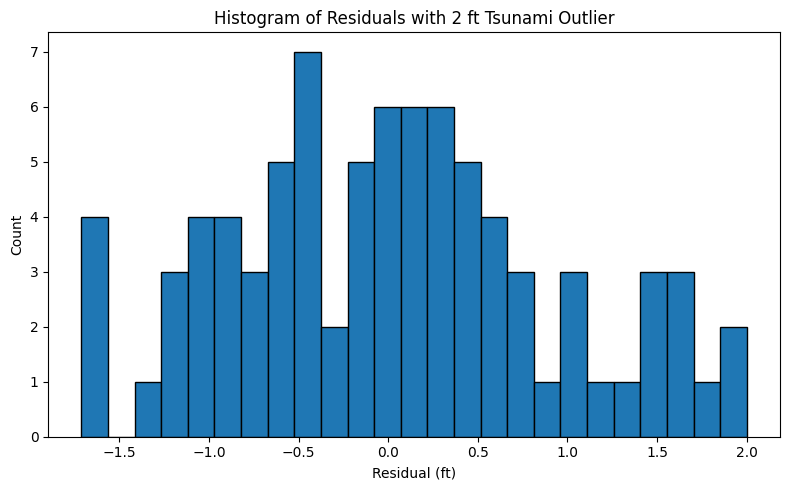

In [17]:
residuals_with_outlier = np.append(residuals, 2.0)

num_sigma = 2.0 / res_std
print(f"The 2 ft tsunami event is {num_sigma:.2f} standard deviations from the model.")

plt.figure(figsize=(8,5))
plt.hist(residuals_with_outlier, bins=25, edgecolor='black')
plt.title("Histogram of Residuals with 2 ft Tsunami Outlier")
plt.xlabel("Residual (ft)")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("tidal_residuals_with_outlier.pdf")
plt.show()